# Análisis de Datos de Misiones Espaciales

En este proyecto limpiaremos datos del dataset de Kaggle Space Mission Launches mediante Excel, una vez tengamos el dataset limpio empezaremos ha hacer el análisis. El objetivo es extraer conclusiones sobre la evolucion de las misiones espaciales y como ciertas épocas han influido en su avance y mejora de los resultados de los lanzamientos espaciales. Finalmente subiremos los datos a una BBDD, en este caso MYSQL Server.

### Contexto

- Descargar el Dataset desde Kaggle
- Limpiarlo con Excel
- Analizarlo 
- Crear gráficos y visualizaciones de datos
- Cargar los datos en una BBDD

### 1. Formulación de Preguntas Clave

- 1.1 ¿Cuáles son las organizaciones con más lanzamientos exitosos?
- 1.2 ¿Cuál es la tendencia de los lanzamientos espaciales a lo largo de los años?
- 1.3 ¿Cuál es el costo promedio de las misiones exitosas en comparación con las fallidas?
- 1.4 ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?
- 1.5 ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


### 2. Preparación del Entorno de Trabajo en Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = 'Misiones espaciales.xlsx'

df = pd.read_excel(path)
df.head()


,Organisation,Country,Location,Year_Complete,Year,Date,Detail,Rocket_Status,Price,Mission_Status
0,CASC,China,"Site 9401 (SLS-2), Jiuquan Satellite Laun...",2020-01-01,2020.0,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,2975,Success
1,CASC,China,"LC-9, Taiyuan Satellite Launch Center, China",2020-01-01,2020.0,"Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-...",StatusActive,6468,Success
2,CASC,China,"LC-101, Wenchang Satellite Launch Center, ...",2020-01-01,2020.0,"Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,Unknown,Success
3,ExPace,China,"Site 95, Jiuquan Satellite Launch Center,...",2020-01-01,2020.0,"Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,283,Failure
4,CASC,China,"LC-3, Xichang Satellite Launch Center, China",2020-01-01,2020.0,"Thu Jul 09, 2020 12:11 UTC",Long March 3B/E | Apstar-6D,StatusActive,2915,Success


### 3. Análisis Exploratorio de Datos (EDA)

In [4]:
#Nombre de columnas


print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (4325, 10)
Nombre columnas: Index(['Organisation', 'Country', 'Location', 'Year_Complete', 'Year', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [5]:
#Información básica del Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Country         4324 non-null   object        
 2   Location        4324 non-null   object        
 3   Year_Complete   4324 non-null   datetime64[ns]
 4   Year            4324 non-null   float64       
 5   Date            4324 non-null   object        
 6   Detail          4324 non-null   object        
 7   Rocket_Status   4324 non-null   object        
 8   Price           4325 non-null   object        
 9   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 338.0+ KB
None


In [6]:
#Descripción estadística de los datos numéricos

df.describe()

,Year_Complete,Year
count,4324,4324.000000
mean,1987-05-22 08:42:30.971322880,1987.386679
min,1957-01-01 00:00:00,1957.000000
25%,1972-01-01 00:00:00,1972.000000
50%,1984-01-01 00:00:00,1984.000000
75%,2002-01-01 00:00:00,2002.000000
max,2020-01-01 00:00:00,2020.000000
std,NaN,18.072562


In [7]:
# Revisión de valores nulos
print(df.isnull().sum())

Organisation      1
Country           1
Location          1
Year_Complete     1
Year              1
Date              1
Detail            1
Rocket_Status     1
Price             0
Mission_Status    1
dtype: int64


### 4. Responder a las Preguntas Planteadas

 4.1 ¿Cuáles son las organizaciones con más lanzamientos exitosos?

['Success' 'Failure' 'Prelaunch  Failure' 'Partial  Failure' nan]
         Organisation  Successful_Launches
35         RVSN  USSR                 1614
2         Arianespace                  269
6                CASC                  231
14  General  Dynamics                  203
46            VKS  RF                  188
31               NASA                  186
42                ULA                  139
5              Boeing                  131
43     US  Air  Force                  129
30   Martin  Marietta                  100
40             SpaceX                   94
28                MHI                   80
32           Northrop                   74
27           Lockheed                   74
20               ISRO                   63
37          Roscosmos                   51
16                ILS                   45
39        Sea  Launch                   33
19               ISAS                   26
25          Kosmotras                   21
4        Blue  Origin          

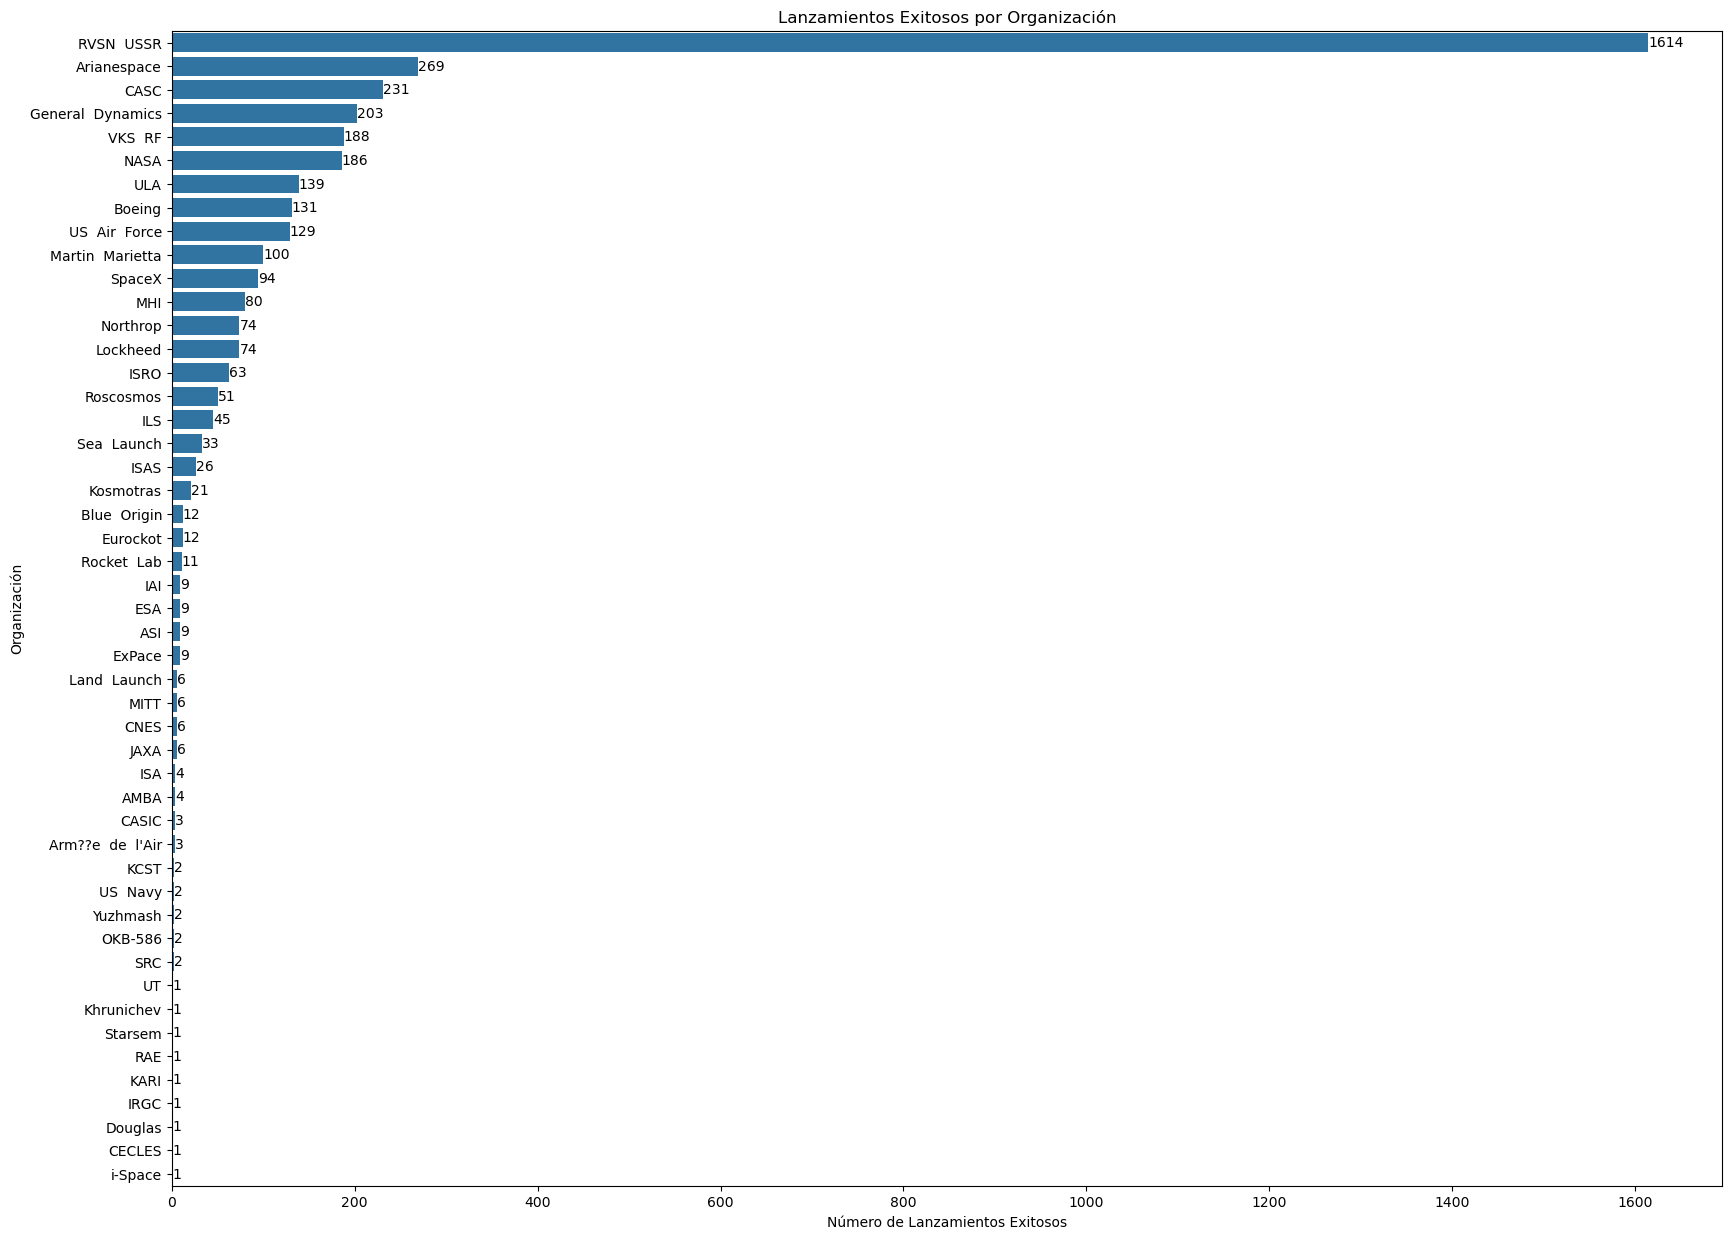

In [7]:
# Asegúrate de que los valores de la columna Mission_Status son correctos
print(df['Mission_Status'].unique())

# Filtraremos las misiones exitosas
successful_missions = df[df['Mission_Status'] == 'Success']

# Verifica si hay misiones exitosas después del filtrado
if successful_missions.empty:
    print("No se encontraron misiones exitosas en el dataset.")
else:
    
    launches_by_organitzation = successful_missions.groupby(['Organisation', 'Country']).size().reset_index(name='Successful_Launches')
    
    launches_by_organitzation['Organisation'] = launches_by_organitzation['Organisation'].str.strip()

    launches_by_organitzation['Successful_Launches'] = pd.to_numeric(launches_by_organitzation['Successful_Launches'], errors='coerce')
    
    launches_by_organitzation = launches_by_organitzation.groupby('Organisation', as_index=False).agg({'Successful_Launches': 'sum'})

    launches_by_organitzation = launches_by_organitzation.sort_values(by='Successful_Launches', ascending=False)

    
    print(launches_by_organitzation)

    
    plt.figure(figsize=(20, 15))
    ax = sns.barplot(data=launches_by_organitzation, x='Successful_Launches', y='Organisation', errorbar=None)

    # Añadir etiquetas 
    for index, value in enumerate(launches_by_organitzation['Successful_Launches']):
        ax.text(value, index, f'{value:.0f}', color='black', ha="left", va="center")

    plt.title('Lanzamientos Exitosos por Organización')
    plt.xlabel('Número de Lanzamientos Exitosos')
    plt.ylabel('Organización')
    plt.show()


Las organizaciones con más lanzamientos exitosos según los datos son:

1. RVSN USSR: 1614 lanzamientos exitosos
2. Arianespace: 269 lanzamientos exitosos
3. CASC: 231 lanzamientos exitosos
4. General Dynamics: 203 lanzamientos exitosos
5. VKS RF: 188 lanzamientos exitosos

 4.2 ¿Cuál es la tendencia de los lanzamientos espaciales a lo largo de los años?

   Year_Complete  Launch_Count
63    2020-01-01            63
62    2019-01-01           109
61    2018-01-01           117
60    2017-01-01            92
59    2016-01-01            90
..           ...           ...
4     1961-01-01            52
3     1960-01-01            39
2     1959-01-01            20
1     1958-01-01            28
0     1957-01-01             3

[64 rows x 2 columns]


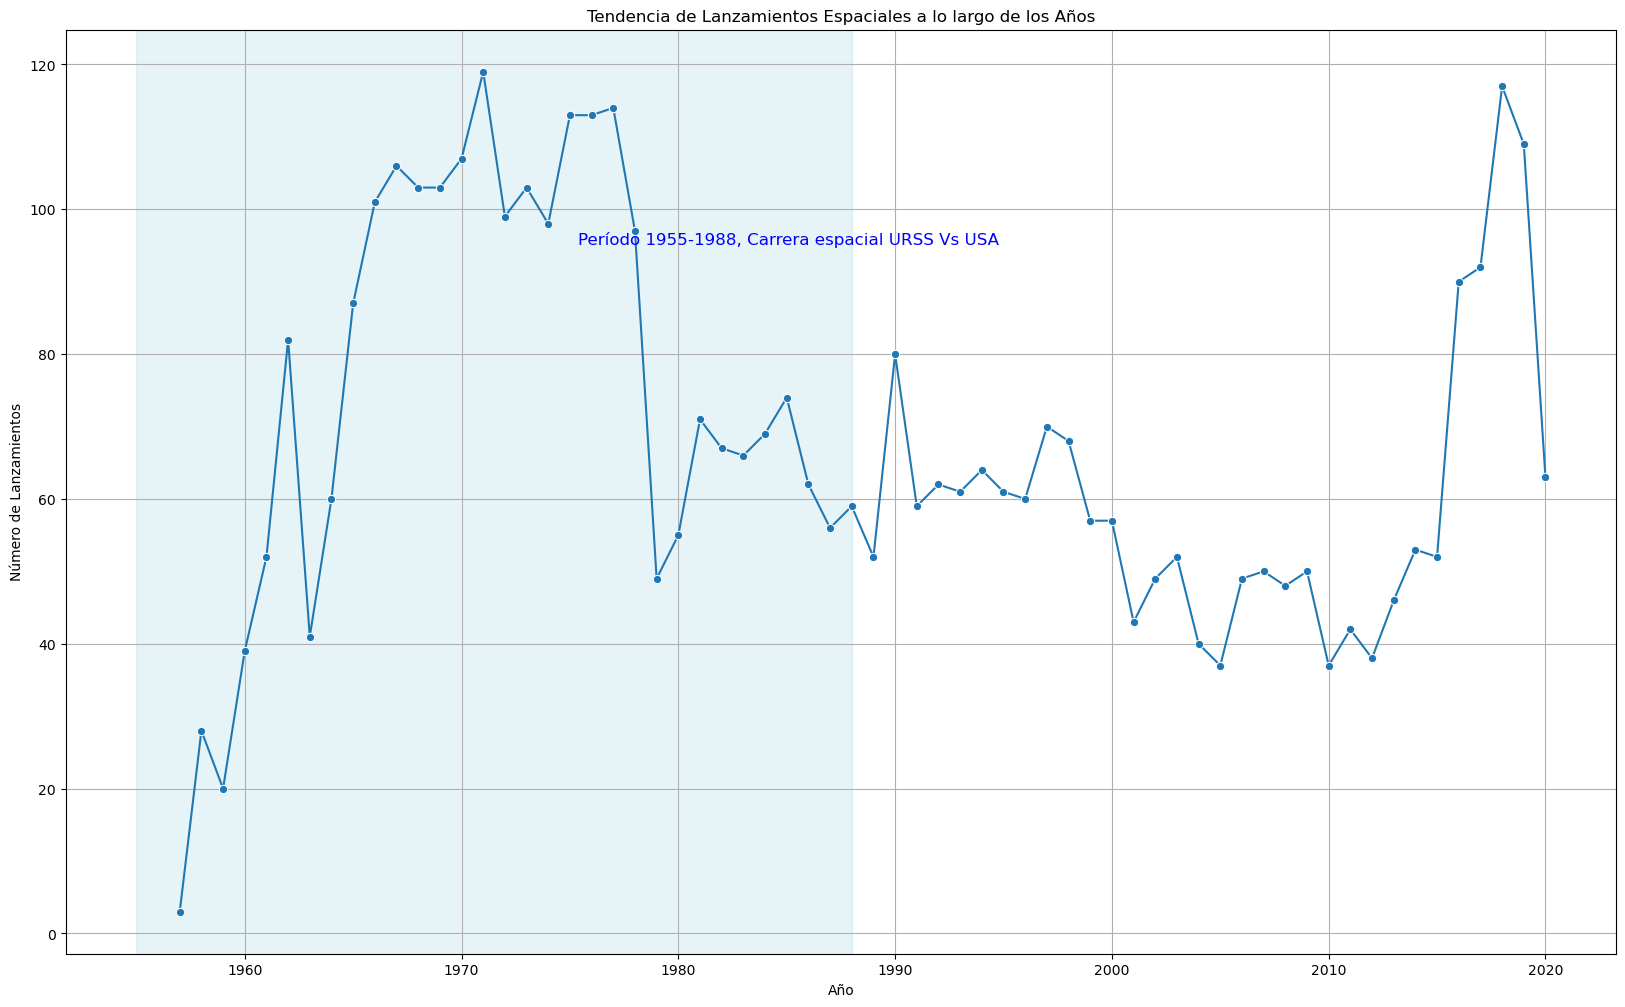

In [9]:
#Cuenta los lanzamientos por año

launches_per_year = df.groupby('Year_Complete').size().reset_index(name= 'Launch_Count')

#Ordenar los años

launches_per_year = launches_per_year.sort_values(by='Year_Complete', ascending = False)

#Imprime los datos

print(launches_per_year)


#Visualiza la tendencia a lo largo de los años

plt.figure(figsize=(20,12))
sns.lineplot(data=launches_per_year, x='Year_Complete', y='Launch_Count',marker = 'o')

# Añade sombreado para resaltar el período 1955-1993
plt.axvspan('1955-01-01','1988-01-01', color='lightblue', alpha=0.3) 


# Añadir una etiqueta para el rango sombreado
plt.text(1960, max(launches_per_year['Launch_Count']) * 0.8, 'Período 1955-1988, Carrera espacial URSS Vs USA', fontsize=12, color='blue')


#Añade detalles gráficos

plt.title('Tendencia de Lanzamientos Espaciales a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')
plt.grid(True)


plt.show()




El gráfico muestra que los lanzamientos espaciales aumentaron rápidamente durante la carrera espacial entre 1955 y 1980, alcanzando un pico de más de 100 lanzamientos anuales. Después de 1980, hubo una caída significativa, con fluctuaciones entre las décadas de 1990 y 2000. Sin embargo, desde 2010, los lanzamientos han vuelto a aumentar notablemente, impulsados por nuevas iniciativas privadas y públicas, como SpaceX.

4.3 ¿Cuál es el costo promedio de las misiones exitosas vs fallidas?

In [10]:

df['Price'] = pd.to_numeric(df.Price, errors='coerce')

# Filtra los datos válidos, es decir, aquellos que tienen un valor numérico en 'Price'
df = df[df['Price'].notnull()]

cost_by_status = df.groupby('Mission_Status')['Price'].sum().reset_index()

cost_by_status.columns = ['Mission_Status','Total_Cost (Milions of $)']

print(cost_by_status)



       Mission_Status  Total_Cost (Milions of $)
0             Failure                    44206.0
1    Partial  Failure                    17673.0
2  Prelaunch  Failure                      620.0
3             Success                  1545699.0


El análisis del costo promedio de las misiones espaciales exitosas versus fallidas revela una diferencia significativa en el gasto asociado a cada tipo de resultado. A continuación, se detallan los costos totales de las misiones según su estado:

- Misiones exitosas (Success): El costo total acumulado asciende a 1,545,699 millones de dólares.
- Misiones fallidas (Failure): Estas misiones han generado un costo total de 44,206 millones de dólares.
- Fallos parciales (Partial Failure): Las misiones con fallos parciales han incurrido en un gasto de 17,673 millones de dólares.
- Fallos antes del lanzamiento (Prelaunch Failure): Estas misiones tuvieron un costo mucho menor, con 620 millones de dólares.

El costo total de las misiones exitosas es notablemente mayor que el de las misiones fallidas o con fallos parciales, lo que sugiere que las misiones exitosas tienden a involucrar inversiones más grandes, probablemente debido a que los proyectos exitosos completan todo el ciclo de la misión, mientras que los fallidos pueden detenerse en fases iniciales o intermedias.

Este análisis también resalta la importancia de la eficiencia y éxito en las misiones espaciales, ya que los fracasos, aunque costosos, representan una porción mucho menor del gasto total en comparación con las misiones exitosas.

4.4 ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?


   Year_Complete     Price
0     1964-01-01   12646.0
1     1965-01-01   12646.0
2     1966-01-01    1770.0
3     1967-01-01    4130.0
4     1968-01-01    4720.0
5     1969-01-01    2360.0
6     1981-01-01    9000.0
7     1982-01-01   13808.0
8     1983-01-01   18308.0
9     1984-01-01   22808.0
10    1985-01-01   40808.0
11    1986-01-01    9308.0
12    1987-01-01     616.0
13    1988-01-01    9658.0
14    1989-01-01   22850.0
15    1990-01-01   31806.0
16    1991-01-01   27400.0
17    1992-01-01   40999.0
18    1993-01-01   33208.0
19    1994-01-01   38119.0
20    1995-01-01   32500.0
21    1996-01-01   36725.0
22    1997-01-01   39913.0
23    1998-01-01   27382.0
24    1999-01-01   29634.0
25    2000-01-01   27699.0
26    2001-01-01   29070.0
27    2002-01-01   43192.0
28    2003-01-01   24601.0
29    2004-01-01   30085.0
30    2005-01-01   19724.0
31    2006-01-01   49066.0
32    2007-01-01   53395.0
33    2008-01-01   57763.0
34    2009-01-01   55889.0
35    2010-01-01   43036.0
3

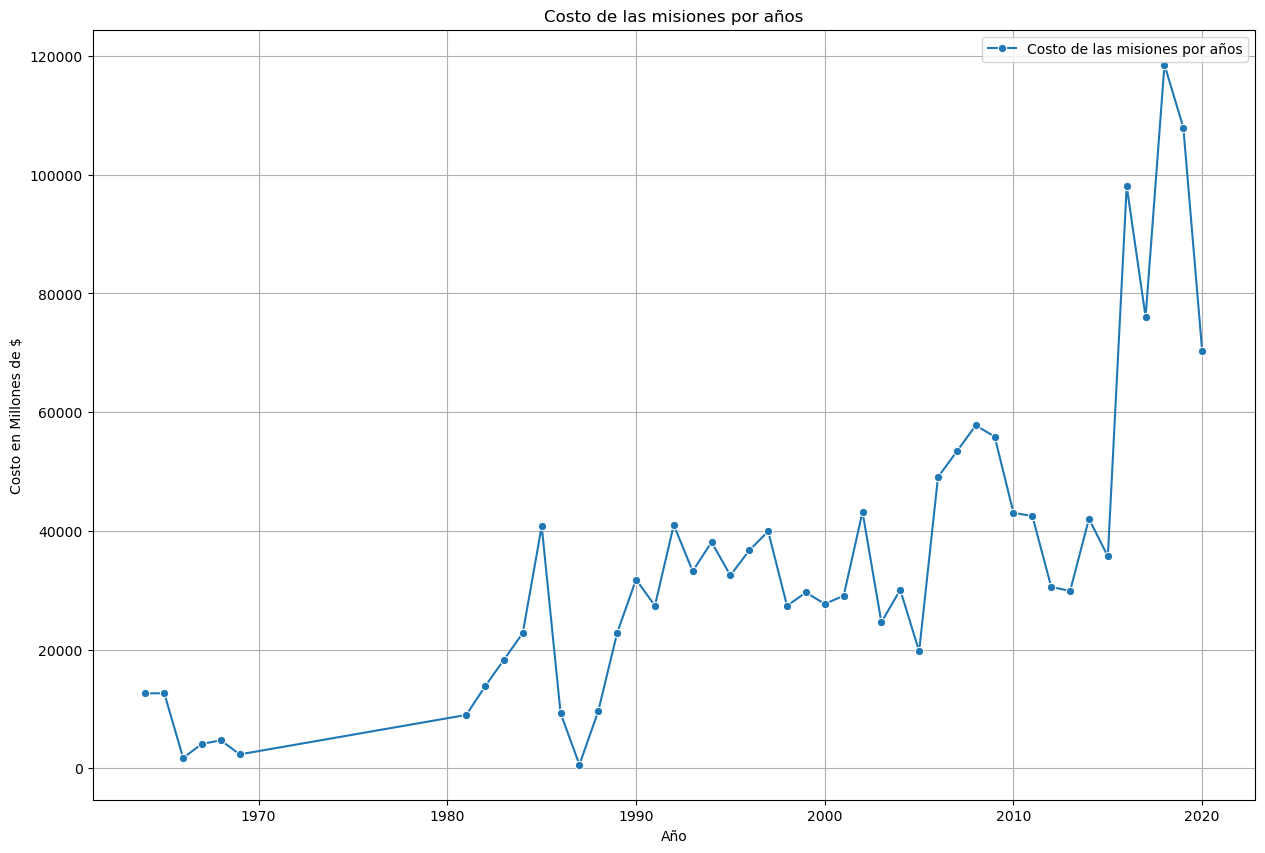

In [11]:

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


df = df[df['Price'].notnull()]


cost_per_year = df.groupby('Year_Complete')['Price'].sum().reset_index()

print(cost_per_year)


plt.figure(figsize=(15, 10))
sns.lineplot(x='Year_Complete', y='Price', data=cost_per_year, label='Costo de las misiones por años',marker='o')

plt.title('Costo de las misiones por años')
plt.xlabel('Año')
plt.ylabel('Costo en Millones de $')
plt.grid(True)
plt.legend()
plt.show()


Cabe recalcar que hay años que faltan datos, pero en general las conclusiones serían las siguientes:

- Antes de 1970: Los costos eran relativamente bajos debido a la tecnología limitada y los objetivos más modestos.

- Décadas de 1970 y 1980: Hubo un aumento en los costos con el desarrollo de programas como el Apolo y el transbordador espacial de la NASA.

- Década de 1990: Los costos se estabilizaron un poco, aunque seguían siendo altos debido a misiones complejas como el Telescopio Espacial Hubble.

- Década de 2000: Se observa un aumento significativo en los costos, especialmente con el desarrollo de la Estación Espacial Internacional (ISS).

- Década de 2010: Los costos alcanzaron un pico notable, posiblemente debido a misiones ambiciosas y el desarrollo de nuevas tecnologías.

- Después de 2010: Aunque los costos siguen siendo altos, hay una tendencia a la baja gracias a la participación de empresas privadas como SpaceX, que han logrado reducir los costos de lanzamiento.

Los costos han fluctuado con el tiempo, influenciados por avances tecnológicos, la participación de nuevos actores en la industria espacial y por supuesto la ambición de las misiones.

4.5 ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

Mission_Status  Failure  Partial  Failure  Prelaunch  Failure  Success  \
Year_Complete                                                            
1964-01-01            1                 0                   0        1   
1965-01-01            0                 0                   0        2   
1966-01-01            0                 0                   0        3   
1967-01-01            1                 1                   0        5   
1968-01-01            0                 0                   0        8   
1969-01-01            0                 0                   0        4   
1981-01-01            0                 0                   0        2   
1982-01-01            0                 0                   0        4   
1983-01-01            0                 0                   0        5   
1984-01-01            0                 0                   0        6   
1985-01-01            0                 0                   0       10   
1986-01-01            1               

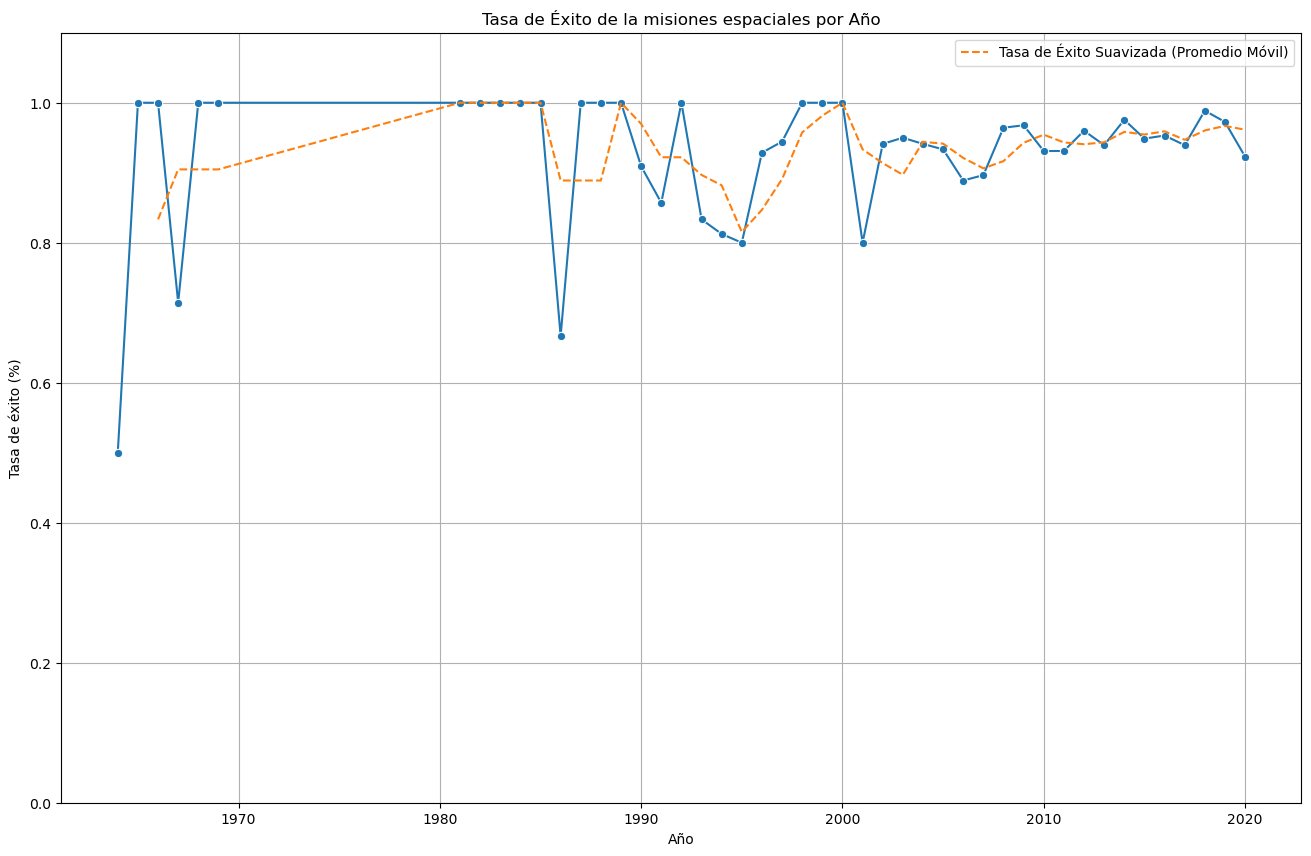

In [12]:
# Agrupa por año y estado de misión para contar cuántas misiones han sido exitosas o fallidas cada año

missions_by_year= df.groupby(['Year_Complete','Mission_Status']).size().unstack(fill_value=0)

#Calcular la tasa de éxito por año

missions_by_year['Total_Missions'] = missions_by_year.sum(axis=1)
missions_by_year['Success_Rate'] = missions_by_year['Success']/missions_by_year['Total_Missions']

# Aplicar un promedio móvil de 5 años a la tasa de éxito para suavizar las fluctuaciones
missions_by_year['Success_Rate_Smoothed'] = missions_by_year['Success_Rate'].rolling(window=3).mean()

print(missions_by_year)

plt.figure(figsize=(16,10))

#Gráfico original sin suavizar
sns.lineplot(x=missions_by_year.index, y=missions_by_year['Success_Rate'], marker='o')

# Gráfico con la tasa de éxito suavizada (promedio móvil)
sns.lineplot(x=missions_by_year.index, y=missions_by_year['Success_Rate_Smoothed'], label='Tasa de Éxito Suavizada (Promedio Móvil)', linestyle='--')


plt.title('Tasa de Éxito de la misiones espaciales por Año')
plt.xlabel('Año')
plt.ylabel('Tasa de éxito (%)')
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()

plt.show()


A lo largo de los años ha habido ciertas fluctuaciones con la tasa de éxitos de las misiones espaciales, en los años 70 y 80 la tasa de éxito según los datos era de casi el 100%, también el número de misiones era ínfimo comparado con el número de misiones de hoy en día. Actualmente, la tecnología ha avanzado muchísimo, pero el nivel de complejidad y de ambición ha aumentado mucho, por ese motivo hay pequeñas variaciones en la tasa de éxitos de los lanzamientos.

### 5. Cargar datos en una BBDD

5.1 Conexión a la BDD

In [13]:
import mysql.connector
from mysql.connector import Error

hostname = '*******'
database = 'analisis_datos'
username = '******'
password = '********'
port = 3306

try:
    # Conectar a la base de datos
    conn = mysql.connector.connect(
        host=hostname,
        database=database,
        user=username,
        password=password,
        port=port
    )

    if conn.is_connected():
        print('Conexión exitosa a la base de datos')

        # Crea un cursor
        cursor = conn.cursor()

        # Define la consulta para crear la tabla
        create_table_query = """
        CREATE TABLE IF NOT EXISTS analisis_misiones (
            id INT AUTO_INCREMENT PRIMARY KEY,
            Organisation VARCHAR(255),
            Country VARCHAR(255),
            Location VARCHAR(255),
            Year_Complete DATE,
            Year INT,
            Date DATE,
            Detail TEXT,
            Rocket_Status VARCHAR(50),
            Price DECIMAL(10, 2),
            Mission_Status VARCHAR(50)
        );
        """

        # Ejecuta la consulta para crear la tabla
        cursor.execute(create_table_query)
        print("Tabla creada exitosamente")

        # Cierra el cursor y la conexión
        cursor.close()
        conn.close()

except Error as e:
    print(f"Ocurrió un error: {e}")






Conexión exitosa a la base de datos
Tabla creada exitosamente


Añadir datos a la BBDD

In [14]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import Error

# Define tus credenciales y detalles de la base de datos
hostname = '*******'
database = 'analisis_datos'
username = '******'
password = '********'
port = 3306
xlsx_file = "Misiones espaciales.xlsx"

try:
    # Crea la conexión a la base de datos usando SQLAlchemy
    engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}:{port}/{database}')
    
    # Lee el archivo XLSX
    df = pd.read_excel(xlsx_file)

    # Asegúrate de que las columnas en el DataFrame coincidan con las de la tabla
    print("Datos leídos del archivo XLSX:")
    print(df.head())  # Muestra las primeras filas para verificar

    # Convierte la columna 'Date' a formato fecha si es necesario
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Elimina la columna Year_Complete
    df = df.drop(columns=['Year_Complete'], errors='ignore')

    # Convierte la columna 'Price' a numérico, reemplazando 'Unknown' y otros valores no numéricos
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

    # Elimina filas con valores NaN en las columnas importantes
    df = df.dropna(subset=['Price', 'Organisation', 'Country', 'Location', 'Year', 'Date', 'Detail', 'Rocket_Status', 'Mission_Status'])

    # Inserta los datos en la tabla
    df.to_sql('analisis_misiones', con=engine, if_exists='append', index=False)

    print("Datos importados exitosamente")

except Error as e:
    print(f"Ocurrió un error: {e}")




Datos leídos del archivo XLSX:
  Organisation Country                                           Location  \
0         CASC   China  Site  9401  (SLS-2),  Jiuquan  Satellite  Laun...   
1         CASC   China  LC-9,  Taiyuan  Satellite  Launch  Center,  China   
2         CASC   China  LC-101,  Wenchang  Satellite  Launch  Center, ...   
3       ExPace   China  Site  95,  Jiuquan  Satellite  Launch  Center,...   
4         CASC   China  LC-3,  Xichang  Satellite  Launch  Center,  China   

  Year_Complete    Year                             Date  \
0    2020-01-01  2020.0  Thu  Aug  06,  2020  04:01  UTC   
1    2020-01-01  2020.0  Sat  Jul  25,  2020  03:13  UTC   
2    2020-01-01  2020.0  Thu  Jul  23,  2020  04:41  UTC   
3    2020-01-01  2020.0  Fri  Jul  10,  2020  04:17  UTC   
4    2020-01-01  2020.0  Thu  Jul  09,  2020  12:11  UTC   

                                              Detail Rocket_Status    Price  \
0         Long  March  2D  |  Gaofen-9  04  &  Q-SAT  StatusActive